# Titanic Data Analysis 

## Intro
The **Data Analysis Process** consists fundamentally of **5 steps**:
1. Questions
2. Wrangle
3. Explore
4. Draw conclusions
5. Communicate

## Step 1 - Questions
I will start posing some questions that I find interesting and that I will address throughout the project. 

In order to formulate better questions, I will first have a look on the different columns or variables of the dataset and deeply understand the meaning of each one by having a look on the [Kaggle Website]( https://www.kaggle.com/c/titanic/data). To do so, I will import the main packages needed for carrying out this project and I will convert the `.csv` dataset into a `pandas.DataFrame` and show the `head` of the `DataFrame`

In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Create a DataFrame from a .csv file with the comprehensive data of Titanic passengers and show the first rows
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# This will make plots to appear in the center of the jupyter cell. Just for being a bit more stylish
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: left;
    vertical-align: middle;
}
</style>
""")

We can realize that the column **Cabin** seems to have some issues with the type of data, as we can see some `NaN`'s in it, but we will address this issue later on.

Below, I brought the explanation of the different columns to ease the understanding to anyone reading this project in the future. I'm sure that it'll be pretty useful!
 
 Variable | Definition  | Variable notes
 :---|:--- |:---
Survived |Survived (0 = No, 1 = Yes) |
Pclass |Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)|**Pclass**: A proxy for socio-economic status (SES) (1st = Upper, 2nd = Middle, 3rd = Lower)
Name |Name|
Sex |Sex|
Age |Age in years|**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
SibSp |# of siblings/spouses aboard on Titanic|**SibSp**: The dataset defines family relations in this way... **Sibling** = brother, sister, stepbrother, stepsister **Spouse** = husband, wife (mistresses and fiancés were ignored)
Parch |# of parents / children aboard the Titanic|**Parch**: The dataset defines family relations in this way... Some children travelled only with a nanny, therefore parch=0 for them. **Parent** = mother, father **Child** = daughter, son, stepdaughter, stepson
Ticket |Ticket number|
Fare |Passenger fare|
Cabin |Cabin number|
Embarked |Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)|

Once we better understood the dataset, we are in place of stating some questions to be demonstrated later on. What factors made people more likely to survive?
1. **Were age and gender relevant factors in survival rate?**
2. **Did women and children had a significantly better survival rate?** 
3. **Did people from upper classes have a better survival rate regardless sex and age?**
4. **Was the location of the cabin a key factor on survival rate?**

## Step 2 - Data wrangling
For this task, we will ensure that our passenger database is complete and there are not duplicated entries.If not, we will identify its data gaps and singularities and fix them.

In [22]:
# Lowercase all the variable names
titanic_data.rename(columns = lambda x: x.lower(), inplace = True)
titanic_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print('Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum()))

# Count the records for each data field and identify their gaps and singularities
titanic_data.count()

Number of duplicate entries is/are 0


Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

We have found that the majority of the 891 passengers have records on the all the fields but for **`Age`**, **`Cabin`** and **`Embarked`**:
* **Age**: we only have 714 records of passengers whose age then is known

In [12]:
# Find the subgroup of people whose age is known
titanic_data_cleaned = titanic_data[titanic_data.Age.isnull() == False]
titanic_data_cleaned


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* **Cabin**: we only know the cabin that 204 people occupied

In [14]:
# Find the subgroup of people whose cabin number is known
titanic_data_cabins = titanic_data[titanic_data.Cabin.isnull() == False]
titanic_data_cabins.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* **Embarkation port**: there are 2 people whose embarkation port is not specified

In [15]:
# Identify the 2 passengers which don't have record for its emarkation port
titanic_data[titanic_data.Embarked.isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Mrs. George Nelson Stone (Martha Evelyn Stone Harrington) and Miss Rose Amélie Icard travelled together according to [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) and both boarded the Titanic at Southampton, so we could add their embarkation port to the DataFrame in order to get more accurate results.

In [16]:
titanic_data.loc[62, 'Embarked'] = 'S'
titanic_data.loc[830, 'Embarked'] = 'S'

## Step 3 - Explore
We will fundamentally base our study in the analysis of certain subgroups of the dataset and their survival rate. We will figure out some ideas on what could be significant causes of either survivals or casualties starting from the different fields provided in the dataset and getting other extra subfields that we can find interesting for enriching the study.

C:\Users\Serg\Anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


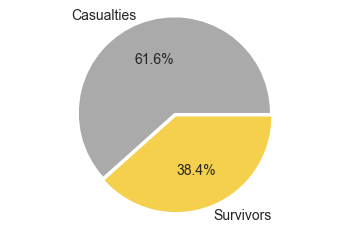

In [19]:
# Plot a pie chart with both survivors and casualties to get the big picture
survival_perc = titanic_data["Survived"].value_counts().plot(kind='pie', labels = ['Casualties', 'Survivors'], colors = ['#AAAAAA', '#F5D04C'],
                                             autopct='%1.1f%%', explode = (0, 0.04), fontsize = 14)
survival_perc.set_ylabel('')
survival_perc.axis('equal')

# Define subsets for age range, so we can divide people by 
titanic_data_cleaned.loc[titanic_data_cleaned['Age'] <= 18, 'age_range'] = '<=18'
titanic_data_cleaned.loc[titanic_data_cleaned['Age'] > 55, 'age_range'] = '>55'
titanic_data_cleaned.loc[(titanic_data_cleaned['Age'] > 18) & (titanic_data_cleaned['Age'] <= 55), 'age_range'] = 'Adults'


Among this sample of 889 passengers of the Titanic, less than 40% of them remained alive after the catastrophe

### 1. **Were age and gender relevant factors in survival rate?**

In [20]:
# Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()
groupedby_class_survived_size


Pclass  Survived  Sex   
1       0         female      3
                  male       61
        1         female     82
                  male       40
2       0         female      6
                  male       84
        1         female     68
                  male       15
3       0         female     55
                  male      215
        1         female     47
                  male       38
dtype: int64

### 1. **Was age a relevant factor in survival rate?**

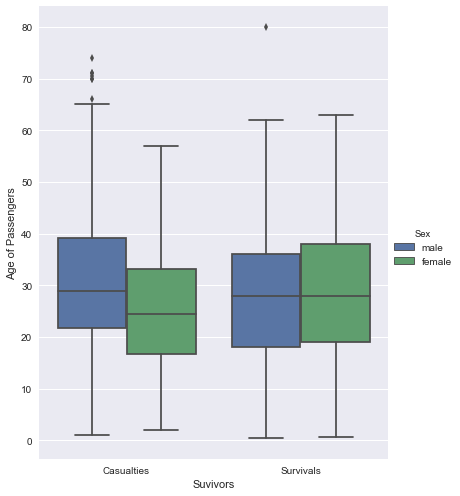

In [21]:
# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
g.set_axis_labels('Suvivors', 'Age of Passengers').set_xticklabels(["Casualties", "Survivals"])



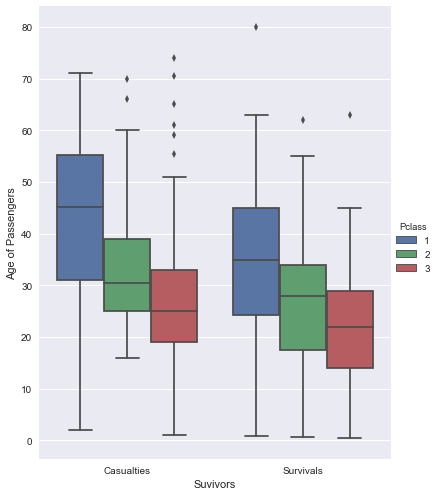

In [22]:
# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Pclass', data=titanic_data_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
g.set_axis_labels('Suvivors', 'Age of Passengers').set_xticklabels(["Casualties", "Survivals"])



In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x=idx, y=df['x'], ax=ax1)
sns.regplot(x=idx, y=df['y'], ax=ax2)

AttributeError: module 'matplotlib' has no attribute 'subplots'

### 2. **Did women and children had a significantly better survival rate?** 


C:\Users\Serg\Anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


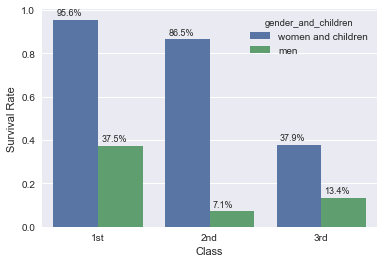

In [134]:
# Define subsets for age range, so we can divide people by 
titanic_data_cleaned.loc[(titanic_data_cleaned['Age'] <= 18) | ((titanic_data_cleaned['Age'] > 18) & (titanic_data_cleaned['Sex'] == 'female')), 'gender_and_children'] = 'women and children'
titanic_data_cleaned.loc[(titanic_data_cleaned['Age'] > 18) & (titanic_data_cleaned['Sex'] == 'male'), 'gender_and_children'] = 'men'


# Create a barplot 
ax = sns.barplot(x="Pclass", y="Survived", hue="gender_and_children", data=titanic_data_cleaned, ci = None, hue_order = ['women and children', 'men'])

# Add percentage tags to the top of each bar
for p in ax.patches:
    ax.annotate("{:.1%}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 0.02), fontsize = 9)

# Rename the labels
ax.set(xlabel='Class', ylabel='Survival Rate')
ax.set_xticklabels(["1st", "2nd", "3rd"])
    

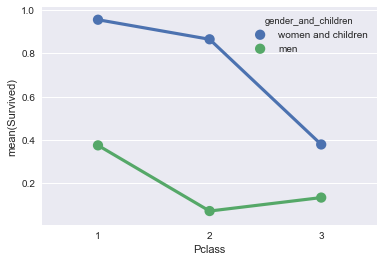

In [135]:
# Create a point plot to see the differences between passenger classes in the survival rate
ax = sns.pointplot(x="Pclass", y="Survived", hue="gender_and_children", data=titanic_data_cleaned, ci = None, hue_order = ['women and children', 'men'])

### 3. **Did people from upper classes have a better survival rate regardless sex and age?**


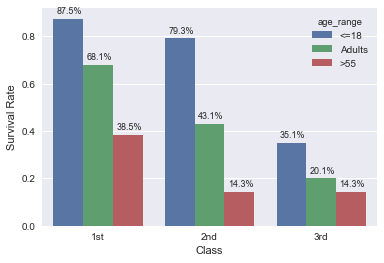

In [101]:
# Create a barplot 
ax = sns.barplot(x="Pclass", y="Survived", hue="age_range", data=titanic_data_cleaned, ci = None, hue_order = ['<=18', 'Adults', '>55'])

# Add percentage tags to the top of each bar
for p in ax.patches:
    ax.annotate("{:.1%}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 0.02), fontsize = 9)

# Rename the labels
ax.set(xlabel='Class', ylabel='Survival Rate')
ax.set_xticklabels(["1st", "2nd", "3rd"])
    

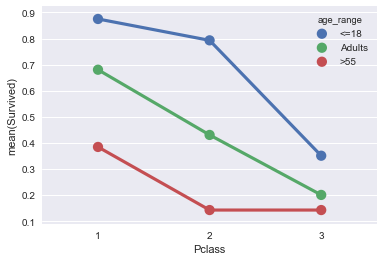

In [102]:
# Create a point plot to see the differences between passenger classes in the survival rate
ax = sns.pointplot(x="Pclass", y="Survived", hue="age_range", data=titanic_data_cleaned, ci = None, hue_order = ['<=18', 'Adults', '>55'])


In [15]:
for p in ax.patches:
    print(p)

Rectangle(-0.25,0;0.5x0.388785)
Rectangle(0.75,0;0.5x0.503597)
Rectangle(1.75,0;0.5x0.3)


In [16]:
perc_survivors_by_agperc_survivors_by_agee = pd.DataFrame(survivors['Age'].value_counts() / titanic_data['Age'].value_counts())
perc_survivors_by_age[perc_survivors_by_age.isnull() == False].plot(kind = 'bar')
perc_survivors_by_age

NameError: name 'perc_survivors_by_age' is not defined

In [17]:
bins = [0,18,30,55,100]
perc_survivors_by_age = perc_survivors_by_age.groupby('bins').val.count()

perc_survivors_by_age.plot(kind = 'bar', title = 'Survival rate by Age')
perc_survivors_by_age

NameError: name 'perc_survivors_by_age' is not defined

### 4. **Was the location of the cabin a key factor on survival rate?**

#### Map of the different decks

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/800px-Titanic_cutaway_diagram.png)

C:\Users\Serg\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


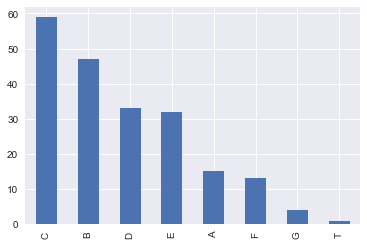

In [168]:
# People by floor (letter of Cabin)
titanic_data_cabins['Floor'] = titanic_data_cabins['Cabin'].astype(str).str[0]
titanic_data_cabins['Floor'].value_counts().plot(kind ='bar')


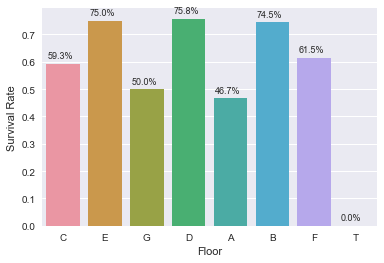

In [173]:
# Create a barplot 
ax = sns.barplot(x="Floor", y="Survived", data=titanic_data_cabins, ci = None)

# Add percentage tags to the top of each bar
for p in ax.patches:
    ax.annotate("{:.1%}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 0.02), fontsize = 9)

# Rename the labels
ax.set(xlabel='Floor', ylabel='Survival Rate')

# CREAR UN GRÁFICO QUE MUESTRE QUE LA GENTE QUE VIAJABA EN CAMAROTE SOBREVIVIÓ MÁS QUE LA MEDIA

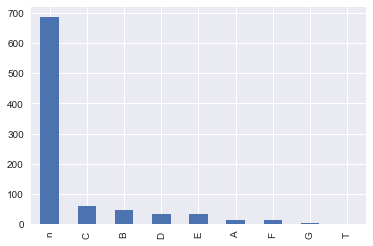

In [155]:
titanic_data['Floor'] = titanic_data['Cabin'].astype(str).str[0]
titanic_data['Floor'].value_counts().plot(kind ='bar')
#Once add the column 'Floor' to the DB, then I repeat the same with Survivors & Casualties
survivors = titanic_data[titanic_data['Survived']==1]
casualties = titanic_data[titanic_data['Survived']==0]


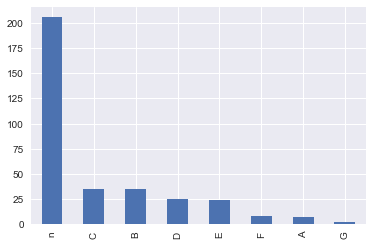

In [30]:
survivors['Floor'].value_counts().plot(kind='bar')

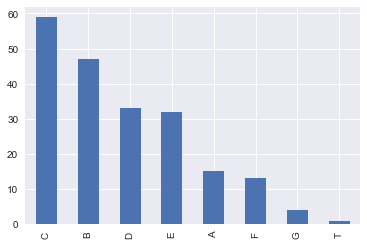

In [31]:
# Update with survivals
cabin_known['Cabin'].astype(str).str[0].value_counts().plot(kind='bar')

891


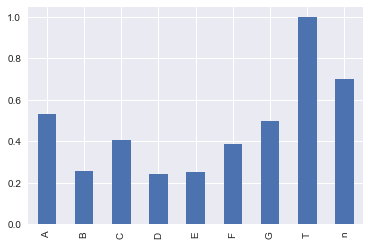

In [32]:
print(titanic_data.shape[0])
percentage_casualties_by_floor = casualties['Floor'].value_counts()/titanic_data['Floor'].value_counts()
percentage_casualties_by_floor.plot(kind = 'bar')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Floor, dtype: int64


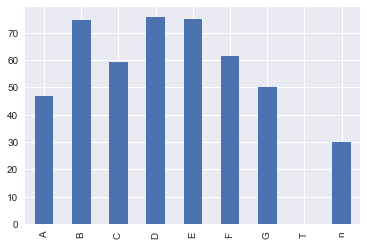

In [34]:
percentage_survivors_by_floor = (survivors["Floor"].value_counts()/titanic_data["Floor"].value_counts())*100
percentage_survivors_by_floor.plot(kind = 'bar')
print(titanic_data['Floor'].value_counts())

### People by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

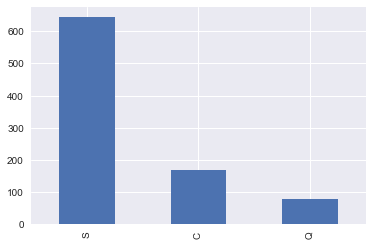

In [35]:
titanic_data["Embarked"].value_counts().plot(kind='bar')

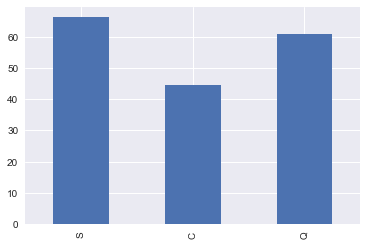

In [36]:
percentage_casualties_by_embarkation = (casualties['Embarked'].value_counts() / titanic_data['Embarked'].value_counts()) *100
percentage_casualties_by_embarkation.plot(kind = 'bar')

In [37]:
pd.set_option('display.max_columns', None)  

In [40]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range,Floor
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,n
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,n
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults,n


In [13]:
for name in titanic_data['Name']:
    if 'Guggenheim' in name:
        guggenheim_data = titanic_data[titanic_data['Name'] == name]
guggenheim_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2,B82 B84,C


In [7]:
titanic_data.loc['Guggenheim' in titanic_data['Name']]

KeyError: 'the label [False] is not in the [index]'